# Coactivation analysis

In this analysis, I contrast the co-activation between each voxel, and the mean co-activation of LFC. In other words, we're looking for voxels across the brain that co-activate with each individual voxel to a greater extent than LFC as a whole.

In [1]:
%matplotlib inline
import nibabel as nib
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.6.pkl")

First, we import the LFC clustering solution, and mask it using a liberal LFC *apriori* mask. This is important because in the previous notebook we *selected* clusers that were primary located in LFC, but 1-2 of them nonetheless included a few voxels outside of LFC. By adding an explcit mask here, we ensure that we're constraing the co-activation contrast to LFC itself. 

In [2]:
from utils import mask_nifti
lfc_70 = nib.load('images/lfc_70.nii.gz')
lfc_70_masked = mask_nifti(lfc_70, nib.load('masks/lfc_mask_liberal.nii.gz'))

Next, we use the function `coactivation_contrast` to perform a co-activation analysis for each cluster. 

The parameter contrast='joint' denotes that we want to contrast the co-activation of each cluster, to the co-activation of all LFC clusters together. That is, for each cluster, we want to identify clusters across the brain that co-activation differentially with that cluster versus LFC as a whole.

The result of this analysis is a list of nifti images, each of which represents differential co-activation for the corresponding cluster

In [3]:
from coactivation import coactivation_contrast
l70_contrast = coactivation_contrast(dataset, lfc_70_masked, contrast='joint')

Finally, we visualize the results on inflated brain surfaces, using pysurfer

In [4]:
%gui qt
from surfer import Brain
import os
from IPython.display import Image
from plotting import surf_coactivation
from colors import l_70_colors

os.environ['SUBJECTS_DIR'] = '/Applications/freesurfer/subjects/'
os.environ['FREESURFER_HOME'] = '/Applications/freesurfer/'

In [5]:
# Brain parameters to be used across all
brain_kwargs = {'size' : (780, 800), 'background' : 'white', 'views' : ['lat', 'med'], 'cortex' : 'bone'}

The function `display_coactivation` takes care of converting volumes to surfaces for plotting. Note the option `reduce_alpha_step` denotes how much to reduce the transparency after a new layer is added. This is used to allow overlapping images to be displayed in a single brain

In [6]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
surf_coactivation(brain, l70_contrast[0:2], colormap=l_70_colors[0:2], alpha=0.9, reduce_alpha_step=0.42)
brain.save_image('plots/motor_coactivation.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpnRs86d.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sKiope8.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpnRs86d.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sn7thC1.mgz


/Users/alejandro/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mayavi/tools/camera.py:288: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if focalpoint is not None and not focalpoint == 'auto':


mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpmUwQpg.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s6caSQi.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpmUwQpg.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s34BoCd.mgz


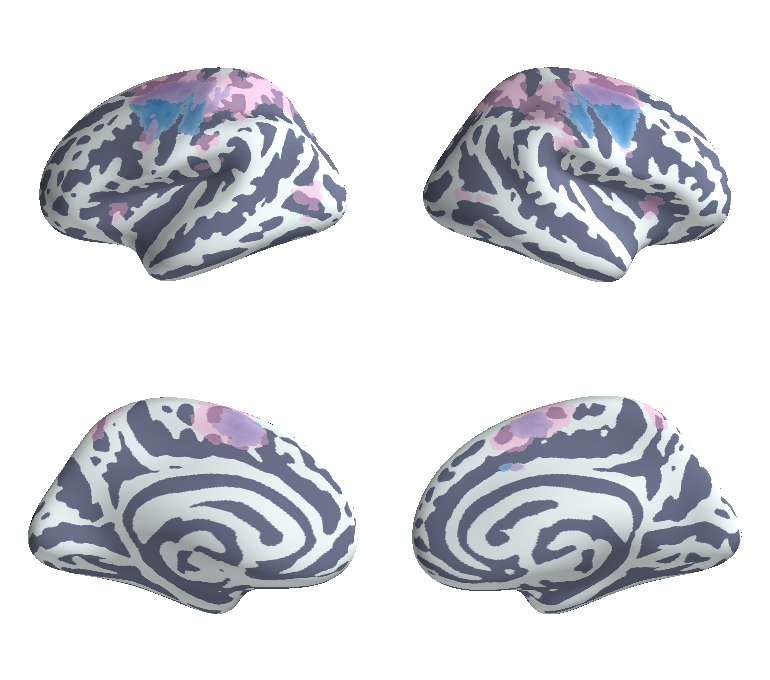

In [7]:
Image('plots/motor_coactivation.png')

In [8]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
surf_coactivation(brain, l70_contrast[2:5], colormap=l_70_colors[2:5], alpha=0.65)
brain.save_image('plots/rostral_FPN_coactivation.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpSfi3qa.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2syayp0c.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpSfi3qa.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sxuQcGO.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp5p7BtE.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2srnHj2D.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp5p7BtE.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sQTHJLz.mgz
mri_vol2surf --mov /var/fold

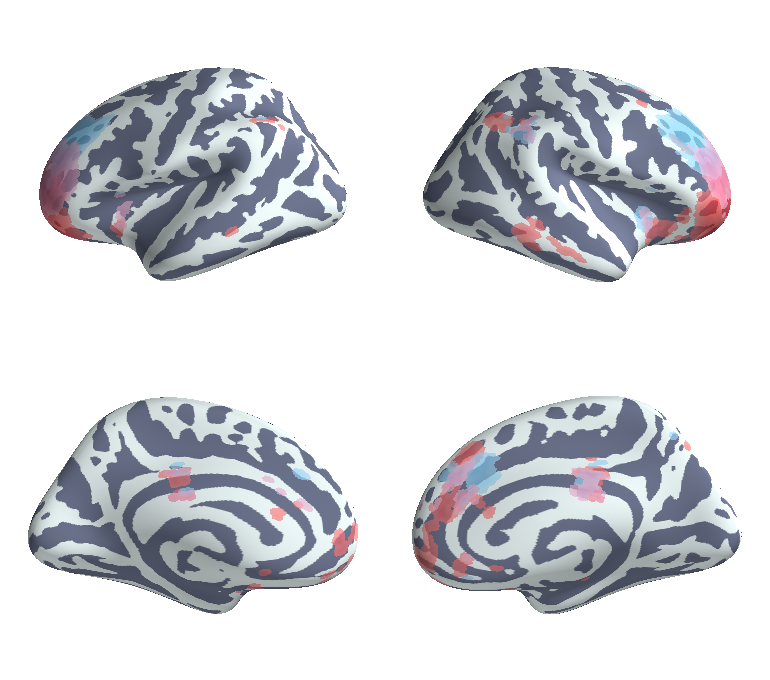

In [9]:
Image('plots/rostral_FPN_coactivation.png')

In [11]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
surf_coactivation(brain, l70_contrast[5:9], colormap=l_70_colors[5:9], alpha=0.7)
brain.save_image('plots/mid_FPN_coactivation.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp3ud7qW.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2siL8LGe.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp3ud7qW.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sndtkyz.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp42MD3N.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sn7Z78A.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmp42MD3N.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s2Tr4gV.mgz
mri_vol2surf --mov /var/fold

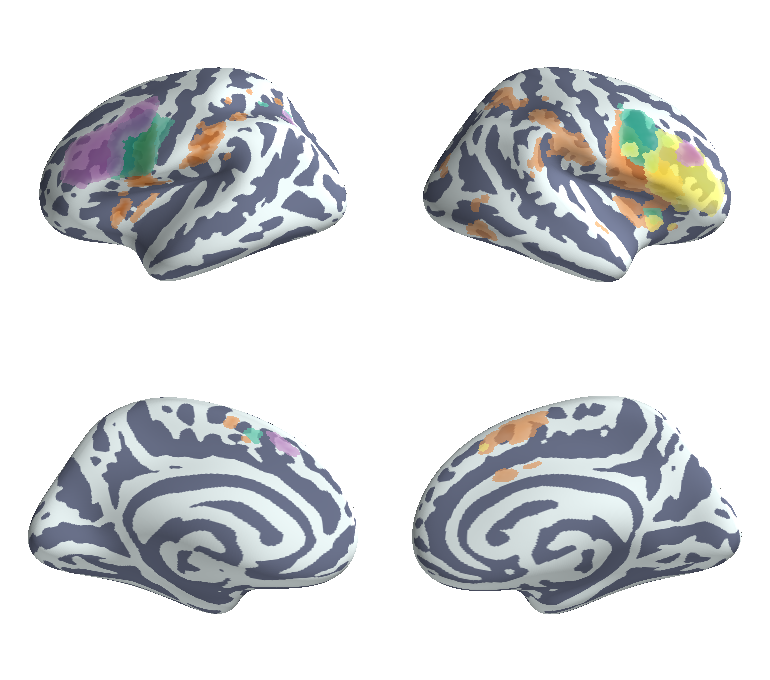

In [12]:
Image('plots/mid_FPN_coactivation.png')

In [13]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
surf_coactivation(brain, l70_contrast[9:11], colormap=l_70_colors[9:11], alpha=0.7)
brain.save_image('plots/caudal_FPN_coactivation.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpE2xVW5.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sdpdglf.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpE2xVW5.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sgA_S20.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpOKrHvN.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s3seiBH.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpOKrHvN.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sW1L6Q0.mgz


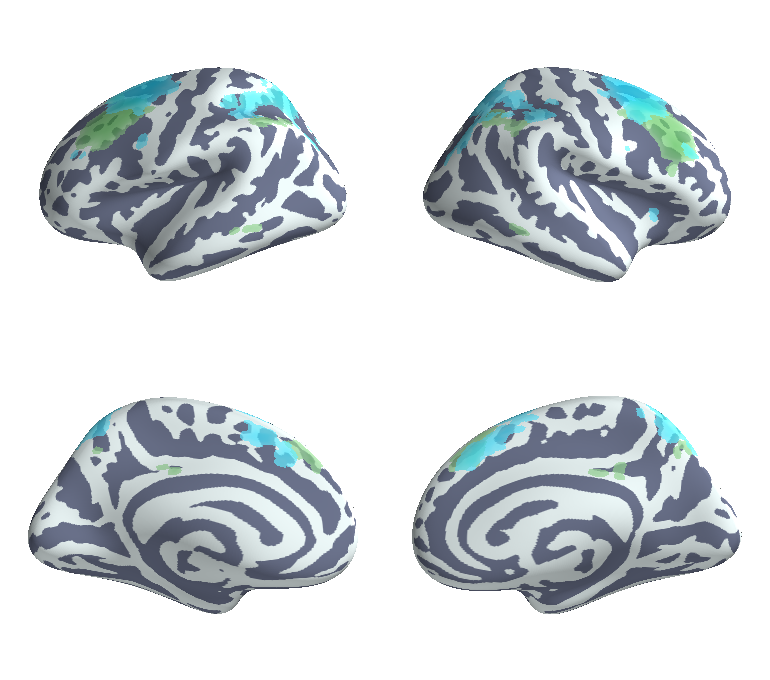

In [14]:
Image('plots/caudal_FPN_coactivation.png')

In [15]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
surf_coactivation(brain, l70_contrast[11:], colormap=l_70_colors[11:], alpha=0.7)
brain.save_image('plots/default_coactivation.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpEQucCW.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2stsEuSW.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpEQucCW.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2suFfhMo.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpzzvnq6.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sZQ9RQ4.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpzzvnq6.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sIzp7R0.mgz
mri_vol2surf --mov /var/fold

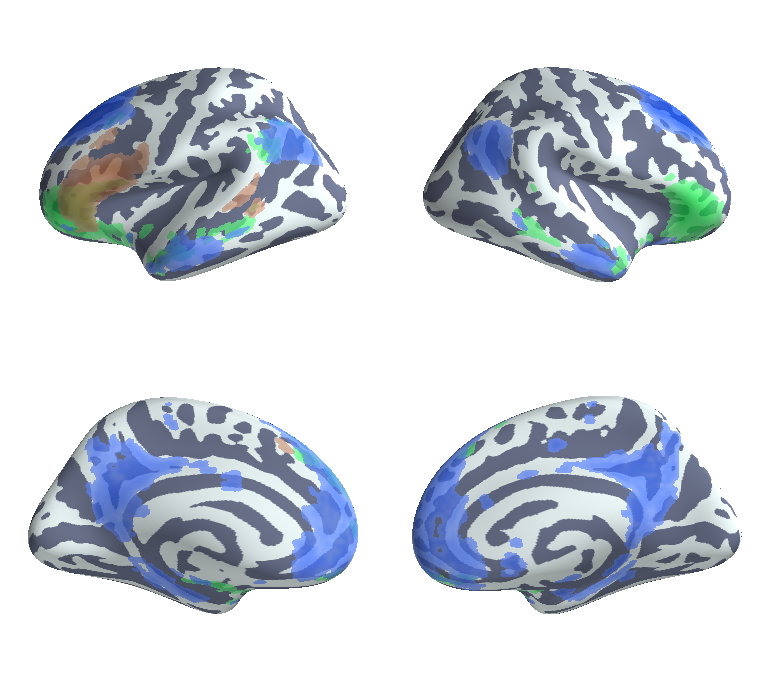

In [16]:
Image('plots/default_coactivation.png')